**классификатор изображений на основе VGG16**

Евгений Борисов <esborisov@sevsu.ru>

---

VERY DEEP CONVOLUTIONAL NETWORKS FOR LARGE-SCALE IMAGE RECOGNITION   
Karen Simonyan, Andrew Zisserman    
Visual Geometry Group, Department of Engineering Science, University of Oxford   

https://arxiv.org/pdf/1409.1556.pdf

---

In [1]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

## модель

In [2]:
import tensorflow as tf

tf.__version__, tf.keras.__version__

2022-11-04 14:00:56.115620: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-04 14:00:56.228307: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-04 14:00:56.712722: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/cuda/lib64::/opt/cuda/lib64
2022-11-04 14:00:56.712826: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.

('2.10.0', '2.10.0')

## загружаем модель

In [3]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import plot_model

In [4]:
# ~/.keras/models
# 250MB
# https://storage.googleapis.com/tensorflow/keras-applications/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels.h5

In [5]:
model = VGG16() # автозагрузка весов

2022-11-04 14:00:58.674177: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-04 14:00:58.706189: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-04 14:00:58.706365: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-04 14:00:58.706881: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

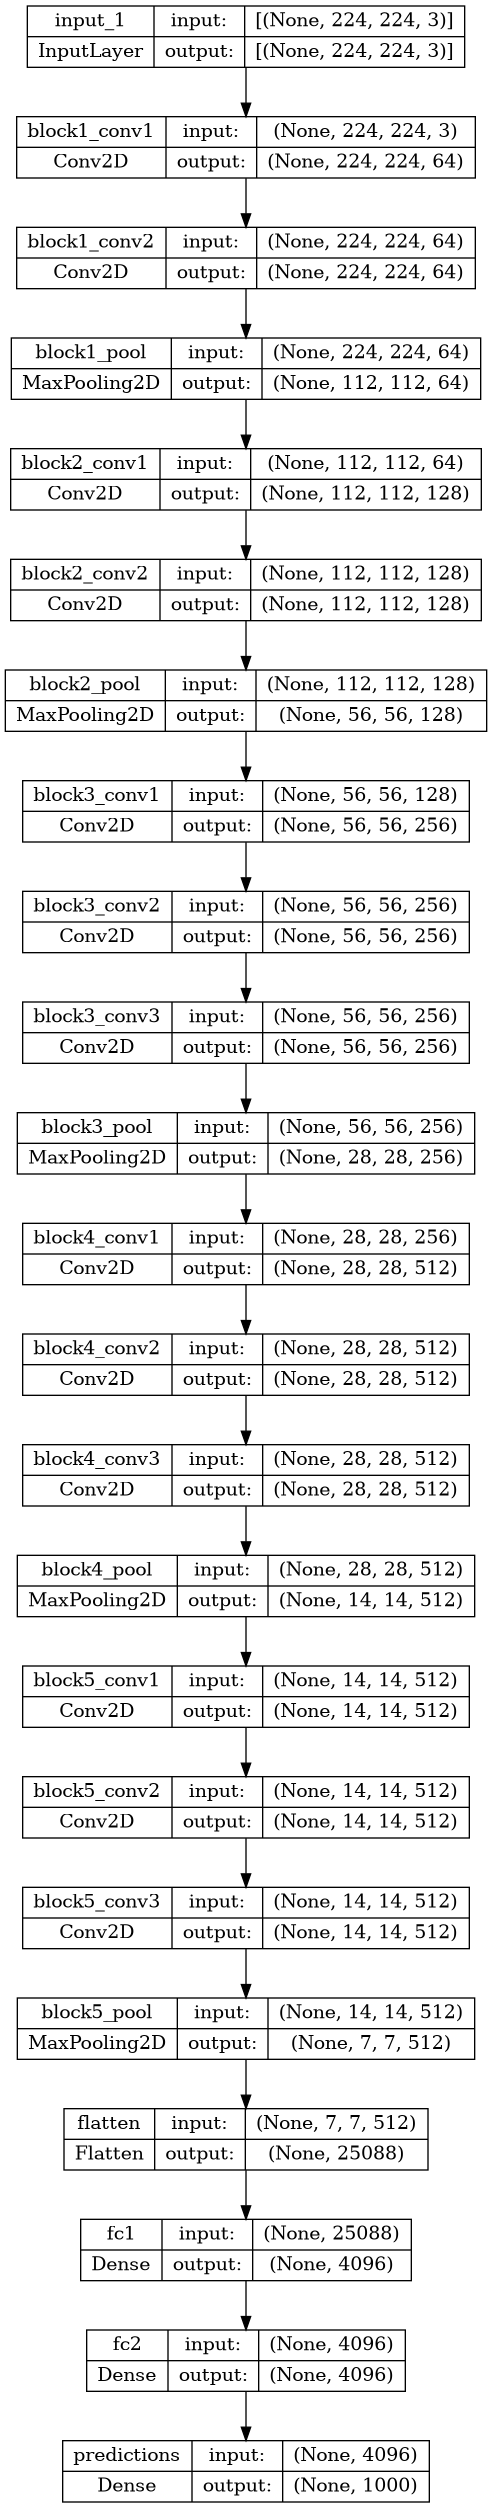

In [6]:
plot_model(model, to_file='vgg16.png', show_layer_names=True, show_shapes=True )

## тестируем

In [7]:
# # имена классов imagenet1000
# !wget ../data/imagenet -c https://gist.githubusercontent.com/yrevar/942d3a0ac09ec9e5eb3a/raw/238f720ff059c1f82f368259d1ca4ffa5dd8f9f5/imagenet1000_clsidx_to_labels.txt

In [10]:
# http://www.image-net.org

with open('../data/imagenet/imagenet1000_clsidx_to_labels.txt', 'rt') as f:   
    imagenet_labels = eval(f.read())

with open('../data/imagenet/photos/index.txt', 'rt') as f: 
    files = [ s for s in f.read().split('\n') if s ]

def image2arr(im):
    return np.array(im.resize([224,224,]).convert('RGB')).astype(np.float32)[np.newaxis,:]

x = np.vstack([image2arr(Image.open('../data/imagenet/photos/'+f)) for f in files])

In [11]:
def draw_images(
        x, # numpy тензор с картинками
        y=[], # метки классов
        class_names=None, # имена классов
        columns=3, # количество колонок в таблице с картинками  
        fig_width=14, # ширина таблицы с картинками
        num_ex=0, # рисуем только первые num_ex
        max_title_len=25 # максимальная длинна заголовка картинки
    ):
    # рисуем данные
    n_img = min(x.shape[0],num_ex) if num_ex>0 else x.shape[0]  # количество картинок для отображения
    col = columns # количество колонок
    w = fig_width # ширина таблицы с картинками
    h = (n_img//col)*(w//col) # высота таблицы с картинками

    fig = plt.figure(figsize=(w,h))
    for n in range(n_img):
        img = x[n,:] # извлекаем одну картинку
        plt.subplot(n_img//col+1,col,n+1) # создаём ячейку таблицы
        plt.axis(False) # оси координат не рисуем
        if len(y)==x.shape[0]:
            t = class_names[y[n]] # имя класса картинки
            t = t if len(t)<(max_title_len+1) else t[:max_title_len]+'...'
            plt.title(t) # заголовок картинки
        plt.imshow(img) # рисуем картинку
    fig.tight_layout() # выравниваем элементы таблицы


2022-11-04 14:04:06.152043: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8500


1/1 [==============================] - 2s 2s/step


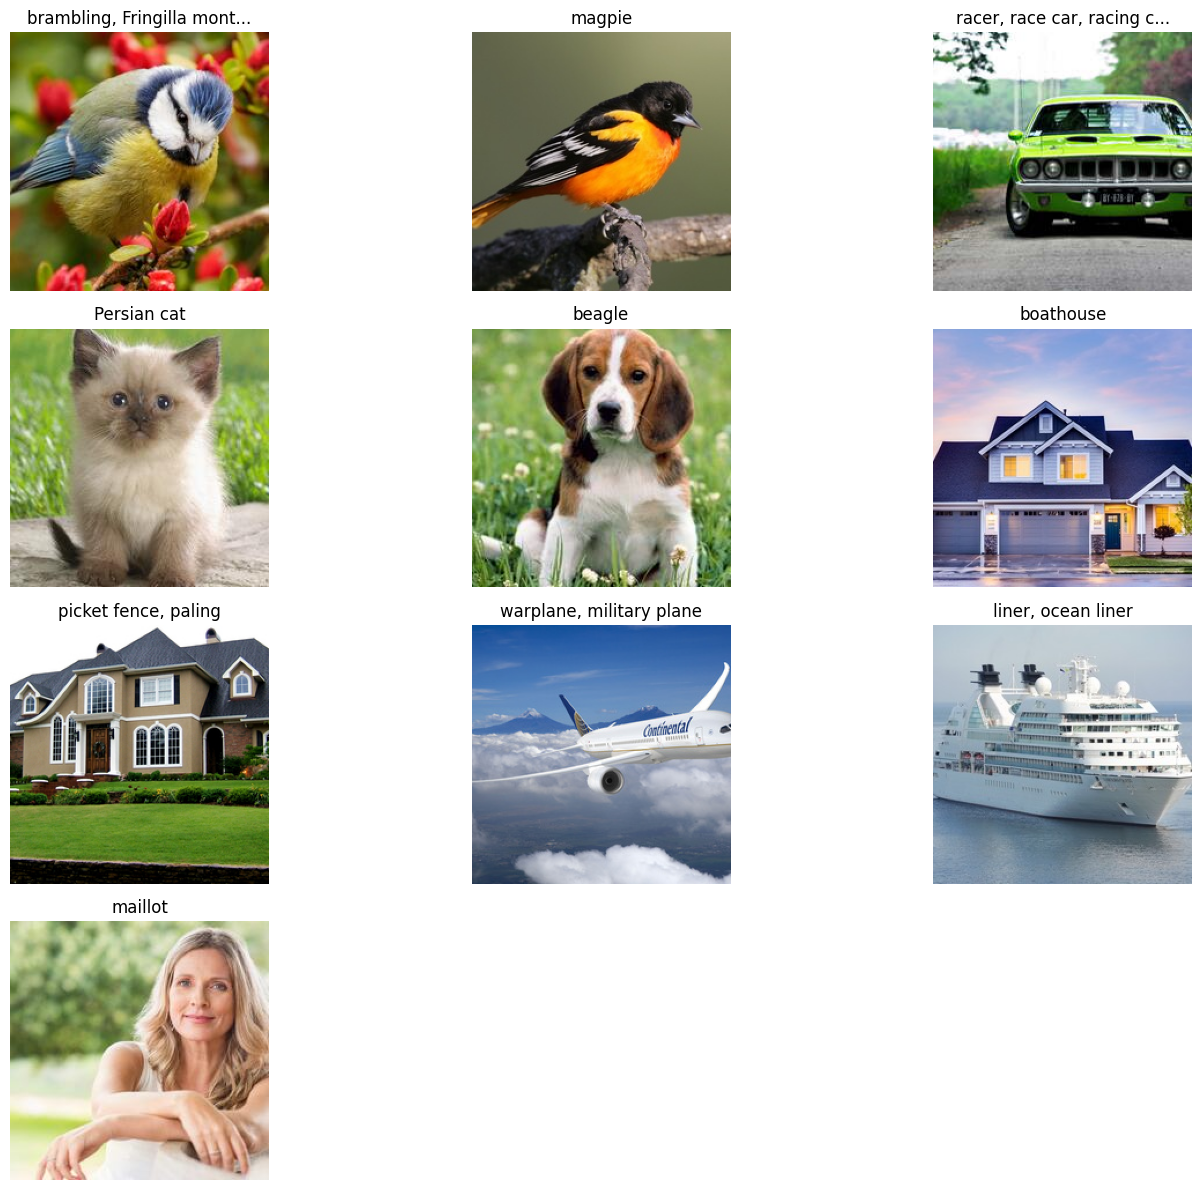

In [12]:
o = model.predict(x)
y = np.argmax(o,axis=1)
draw_images(x.astype(np.uint8),y, imagenet_labels )

In [ ]:
# !mkdir -p ../data/imagenet
# !wget -P ../data/imagenet -c https://storage.googleapis.com/tensorflow/keras-applications/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels.h5

# WEIGHTS_VGG16='data/imagenet/vgg16_weights_tf_dim_ordering_tf_kernels.h5'
# model = VGG16(weights=WEIGHTS_VGG16)